In [99]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [100]:
image = cv2.imread("C:\\Users\\kabir\\OneDrive\\Desktop\\elon_musk.png")
image.shape

(160, 160, 3)

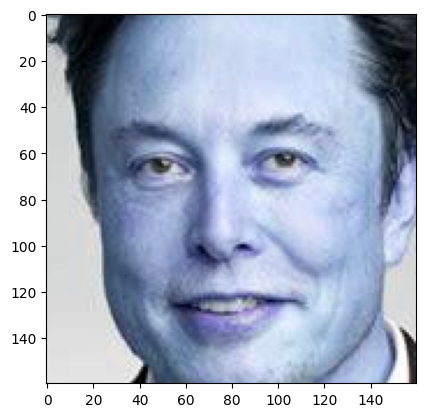

In [101]:
plt.imshow(image)

In [102]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(160, 160)

In [103]:
gray

array([[ 88,  95, 108, ...,  52,  55,  61],
       [144, 112, 105, ...,  42,  40,  49],
       [188, 172, 173, ...,  33,  27,  27],
       ...,
       [227, 227, 227, ...,  83,  40,  34],
       [227, 227, 228, ...,  82,  40,  35],
       [227, 227, 229, ...,  79,  40,  36]], dtype=uint8)

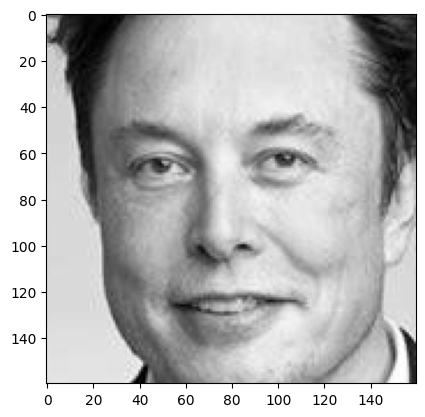

In [104]:
plt.imshow(gray, cmap='gray')

In [105]:
eye_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_eye.xml")
face_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3 ,5)
faces

array([[ 11,  10, 130, 130]])

In [106]:
x,y,w,h = faces[0]
x,y,w,h

(11, 10, 130, 130)

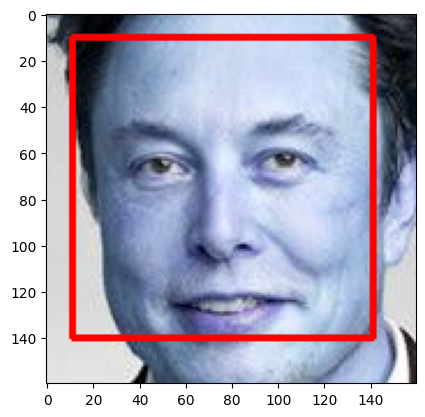

In [107]:
face_img = cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

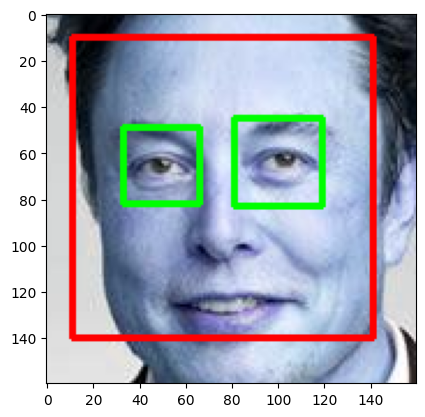

In [108]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

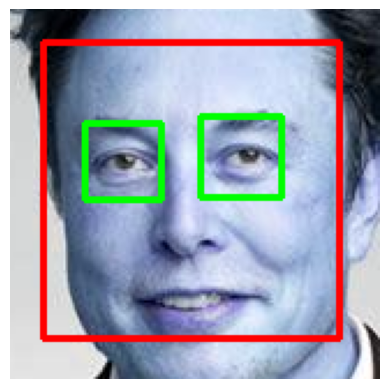

In [109]:
import cv2
import matplotlib.pyplot as plt

# Load the cascade classifiers
eye_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_eye.xml")
face_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_frontalface_default.xml")

# Read the image
image = cv2.imread("C:\\Users\\kabir\\OneDrive\\Desktop\\elon_musk.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around faces and eyes
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

    # Filter out false positive eye detections
    if len(eyes) >= 2:
        # Find eyes closest to the center of the face
        eyes_sorted = sorted(eyes, key=lambda e: abs(e[0] + e[2]//2 - w//2))
        valid_eyes = eyes_sorted[:2]  # Consider the two closest eyes

        # Draw rectangles around valid eyes
        for (ex, ey, ew, eh) in valid_eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Display the image
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.axis('off')
plt.show()


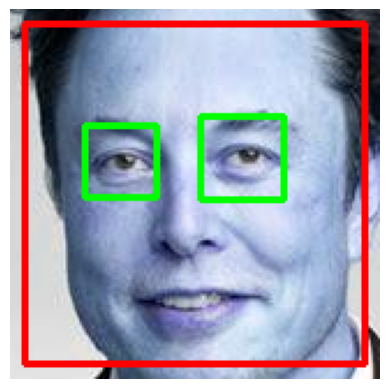

In [113]:
import cv2
import matplotlib.pyplot as plt

# Load the cascade classifiers
eye_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_eye.xml")
face_cascade = cv2.CascadeClassifier("C:\\Users\\kabir\\OneDrive\\Desktop\\haarcascade_frontalface_default.xml")

# Read the image
image = cv2.imread("C:\\Users\\kabir\\OneDrive\\Desktop\\elon_musk.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(500, 500))

# Ensure there is only one face
if len(faces) == 1:
    (x, y, w, h) = faces[0]
    face_img = cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

    # Filter out false positive eye detections
    if len(eyes) >= 2:
        # Find eyes closest to the center of the face
        eyes_sorted = sorted(eyes, key=lambda e: abs(e[0] + e[2]//2 - w//2))
        valid_eyes = eyes_sorted[:2]  # Consider the two closest eyes

        # Draw rectangles around valid eyes
        for (ex, ey, ew, eh) in valid_eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Display the image
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.axis('off')
plt.show()


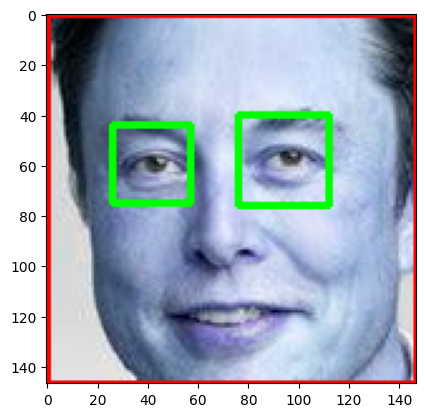

In [114]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [115]:
cropped_img = np.array(roi_color)
cropped_img.shape

(147, 147, 3)

In [116]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = image
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

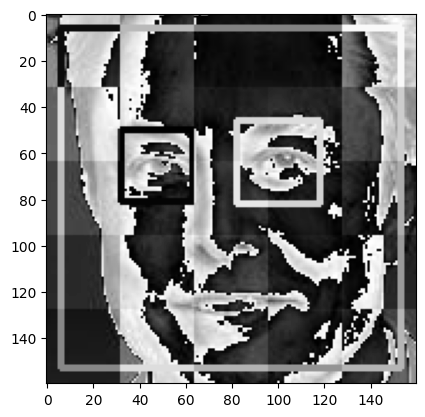

In [117]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap= 'gray')

In [118]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

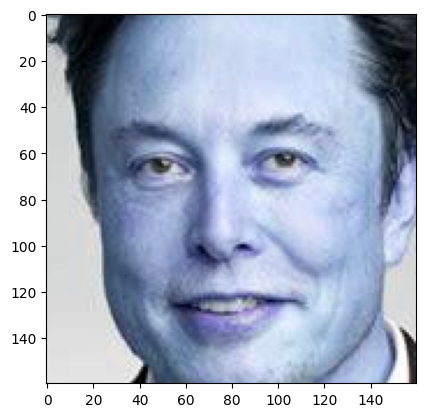

In [120]:
original_image = cv2.imread('C:\\Users\\kabir\\OneDrive\\Desktop\\elon_musk.png')
plt.imshow(original_image)

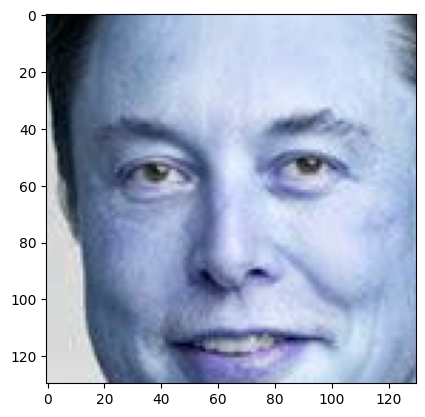

In [121]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Users\\kabir\\OneDrive\\Desktop\\elon_musk.png')
plt.imshow(cropped_image)

In [122]:
path_to_data = "C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/"
path_to_cr_data = "C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/"

In [123]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/bill_gates',
 'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/donald_trump',
 'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/elon_musk',
 'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/jack_ma',
 'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/narendra_modi']

In [124]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [125]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates
Generating cropped images in folder:  C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/donald_trump
Generating cropped images in folder:  C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/elon_musk
Generating cropped images in folder:  C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/jack_ma
Generating cropped images in folder:  C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/narendra_modi


In [126]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bill_gates': ['C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates1.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates2.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates3.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates4.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates5.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates6.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates7.png',
  'C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/bill_gates\\bill_gates8.png'],
 'donald_trump': ['C:/Users/kabir/OneDrive/Desktop/Tech_Classifier/model/dataset/cropped/donald_trump\\donald_trump1.png',
  'C:/Users/kabir/OneDrive/Desktop/Tec

In [127]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bill_gates': 0,
 'donald_trump': 1,
 'elon_musk': 2,
 'jack_ma': 3,
 'narendra_modi': 4}

In [128]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [129]:
len(X[0]), y[0]

(4096, 0)

In [130]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(241, 4096)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8524590163934426

In [132]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.40      0.57         5
           2       0.85      0.88      0.87        26
           3       0.81      0.96      0.88        23
           4       1.00      0.80      0.89         5

    accuracy                           0.85        61
   macro avg       0.93      0.71      0.77        61
weighted avg       0.87      0.85      0.84        61



In [133]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [134]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [135]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.844444,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.722222,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.838889,{'logisticregression__C': 1}


In [136]:
best_estimators['svm'].score(X_test, y_test)

0.8852459016393442

In [137]:
best_estimators['random_forest'].score(X_test,y_test)

0.7868852459016393

In [138]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8852459016393442

In [139]:
best_clf = best_estimators['svm']

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 1,  1,  0,  0,  0],
       [ 0,  4,  1,  0,  0],
       [ 0,  0, 23,  3,  0],
       [ 0,  0,  1, 22,  0],
       [ 0,  0,  0,  1,  4]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

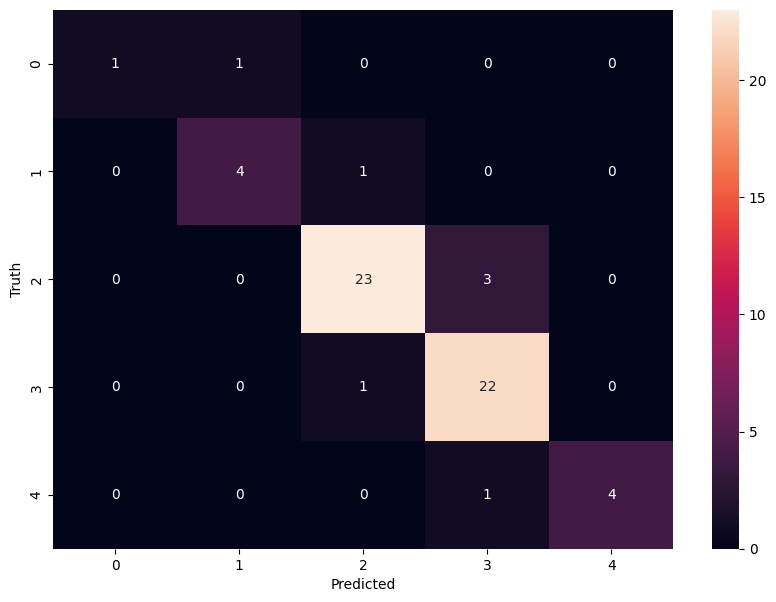

In [141]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [142]:
class_dict

{'bill_gates': 0,
 'donald_trump': 1,
 'elon_musk': 2,
 'jack_ma': 3,
 'narendra_modi': 4}

In [152]:
import cv2
import numpy as np

# Preprocess the image
image_path = 'C:\\Users\\kabir\\OneDrive\\Desktop\\nm.png'  # Replace with the path to your image
img = cv2.imread(image_path)
scalled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img, 'db1', 5)
scalled_img_har = cv2.resize(img_har, (32, 32))

# Prepare the image for prediction
combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32,1)))

# Reshape the combined_img array
reshaped_img = combined_img.reshape(1, 4096).astype(float)

# Make the prediction
predicted_label = best_clf.predict(reshaped_img)
# Access the predicted label

predicted_label # Narendra Modi

array([4])